# Outils pour l'analyse énergétique - Partie \#2

Dans cette partie \#2, quelques fonctions plus avancées.

Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_2.ipynb"> ça se passe ici<a>

## Lire des données
Une compétence fondamentale est la capacité de lire des fichiers.

In [8]:
# quelques précisions au passage sur l'acces aux fichiers
#si le fichier est dans un dossier "src" au même niveau que le script 
#      fichier="./src/le_fichier.txt"
#si le fichier a été téléchargé et se trouve dans le même dossier que le script
#      fichier="./le_fichier.txt"

# on met l'adresse du fichier dans une variable
nom="./src/temperature_entzheim.txt"
fichier = open(nom, "r") # le 'r' correspond à 'read', çàd qu'on ne pourra pas le modifier

# l'instruction est un peu compliquee mais : 
#     - avec "map" on répète une opération "float", qui consiste à convertir chaque ligne en nombre à virgule
#      (sinon python prend ça pour du texte)
#     - avec "list" on met le tout dans une liste
temperatures=list(map(float, fichier))

# ensuite voyons ce que ça donne
print("les 10 premieres temperatures", temperatures[0:10]) # on y accede par les indices, cool hein?
print("au fait, c'est quel type de variable ?", type(temperatures))

les temperatures [2.7, 2.9, 3.3, 3.4, 4.0, 4.6, 4.7, 4.0, 3.4, 5.4]
type ? <class 'list'>


<span style="color:green"> *À vous de jouer : tracez le profil des températures avec **matplotlib**.* </span>

In [ ]:
import matplotlib.pyplot as plt
# la suite...

Il est également possible d'utiliser directement la librairie **pandas**, que l'on explorera plus loin. Je vous invite à ouvrir le fichier \*.csv de l'exemple qui suit afin d'observer le résultat.

<AxesSubplot:>

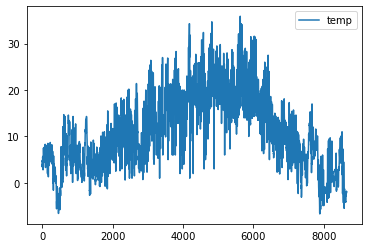

In [15]:
import pandas as pd
fichier="./src/horaire_Strasbourg_2016.csv"
#on va lire le fichier csv 
df = pd.read_csv(fichier) # df pour DataFrame ("cadre de données")
#on le trace avec une commande interne à pandas
df.plot()

On constate que le label de la courbe correspond à l'intitulé de la colonne du \*.csv.

<span style="color:green"> *Faites une boucle qui va lire les fichiers météorologiques présents dans le dossier "src" de ce site. Le chemin pour y accéder serait par exemple "../src/horaire_Strasbourg_2021.csv" et profitez-en pour tracer les séries temporelles de température avec un bon vieux **df.plot**.* </span>

In [1]:
import matplotlib.pyplot as plt
import os
# un indice
i = 1
chemin="../src/horaire_Strasbourg_201"+str(i)+".csv" # on convertit l'entier i en chaine de caracteres (=string)

## Statistiques de base
Une fois que la lecture des données est faite, il est souvent utile d'être en mesure d'en dire quelque chose, à partir de statistiques simples.

### Moyenne et écart-type

La moyenne et l'écart-type (un rappel visuel 
<a href="https://fr.wikipedia.org/wiki/%C3%89cart_type#/media/Fichier:Comparison_standard_deviations.svg"> sur vikipedia<a>) sont directement calculables avec **numpy**, que l'on commence à connaître.

L'utilité de la moyenne est généralement bien connue. Pour l'écart-type, son utilité consiste à évaluer la dispersion d'une distribution (par exemple des notes de partiel, des températures, des angles d'incidence de vent...). Lorsque la distribution est une gaussienne ou suit une loi normale (<a href="https://fr.wikipedia.org/w/index.php?title=Fichier:Normal_Distribution_PDF.svg&lang=fr"> = ressemble à ça <a>), on sait que 95% des valeurs sont comprises entre la moyenne $\mu$ $\pm$ 2 écarts-types $\sigma$ (et plus de 99% des valeurs seront entre $\mu \pm 3 \sigma$).

In [12]:
import numpy as np
# on choisit 10 nombres au hasard entre 0 et 1
vecteur = np.random.rand(10) #comme ca on saura utiliser "random"
print(vecteur)
# calculons la moyenne et l'écart type
moyenne, ecarttype = np.mean(vecteur), np.std(vecteur)
print("Moyenne, écart type :")
print(moyenne, ecarttype)

# plus chic, avec moins de décimales
#print(round(moyenne,3), round(ecarttype,3)) 

[0.28417793 0.80340618 0.96867509 0.88506925 0.56891945 0.67987245
 0.67607459 0.35933727 0.64105875 0.15609615]
Moyenne, écart type :
0.6022687108639675 0.25060724978344345
0.602 0.251


<span style="color:green"> *À vous de jouer - calculez la moyenne et l'écart-type des températures de l'année 2021 à Entzheim.* </span> 

In [ ]:
import numpy as np
# ...

### Boîte à moustaches
L'utilité du diagramme "boîte à moustaches" est de fournir un aperçu des valeurs fondamentales d'une distribution : la moyenne, les extrema (min/max) et les quartiles ou déciles ou 5e et 95e centiles (<a href="https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches#/media/Fichier:Michelsonmorley-boxplot.svg"> un exemple <a>).

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc9b653520>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc9b653ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc9b653250>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc9b6630a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc9b663370>],
 'means': []}

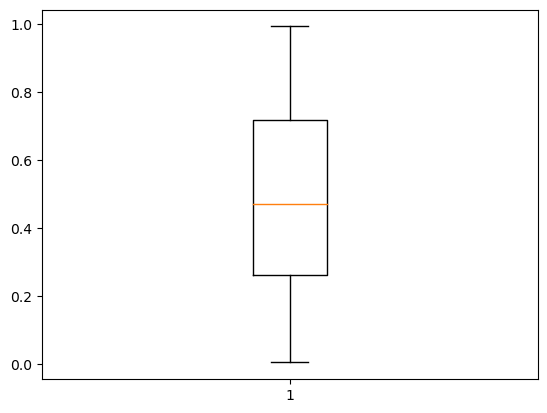

In [13]:
import matplotlib.pyplot as plt
T= np.random.rand(100) # on génère une distribution aléatoire
plt.boxplot(T) # on trace la boite a moustaches

<span style="color:green"> *À vous de jouer : tracez la boîte à moustache pour l'année météorologique de votre choix.* </span>

In [14]:
# un petit coup de main comme d'hab
import matplotlib.pyplot as plt
fichier = './Entzheim.csv'

### Monotone et distribution

In [ ]:
import numpy as np

## Dataframes
Un outil bien pratique pour traiter/lire/écrire des données : le *dataframe*, ou "cadre de données". Nous allons soulever le voile sur une infime fraction de son potentiel.

In [ ]:
import pandas as pd
fichier="../src/Entzheim_2021.csv"
df=pd.read_csv(fichier)
df.describe